In [1]:
import numpy as np
import dask.array as da

### Dask Arrays interface is similar to Numpy API

In [2]:
np_arr = np.random.randint(20, size=20)
np_arr

array([13, 13,  4,  7, 19, 17,  9,  3,  1,  6,  2,  6, 17,  3, 14,  0,  2,
        7, 18,  2])

### In this case, we just need to add an additional attribute `chunks`

In [3]:
dask_arr = da.random.randint(20, size=2000, chunks=500)

### You will see that the array has not been computed till now

In [4]:
dask_arr

dask.array<randint, shape=(2000,), dtype=int64, chunksize=(500,), chunktype=numpy.ndarray>

## This is simply because Dask does lazy evaluaion.   
### You need to call `compute()` to start the execution

In [5]:
dask_arr.compute()

array([ 1, 14, 18, ...,  1,  7, 18])

### Chunks size 

In [6]:
dask_arr.chunks

((500, 500, 500, 500),)

### Creating arrays from existing data

In [7]:
dask_arr_from_np = da.from_array(np_arr, chunks=5)

In [8]:
dask_arr_from_np

dask.array<array, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [9]:
dask_arr_from_np.compute()

array([13, 13,  4,  7, 19, 17,  9,  3,  1,  6,  2,  6, 17,  3, 14,  0,  2,
        7, 18,  2])

## Dask translates your array operations into a graph to tasks

#### See : http://docs.dask.org/en/latest/graphviz.html

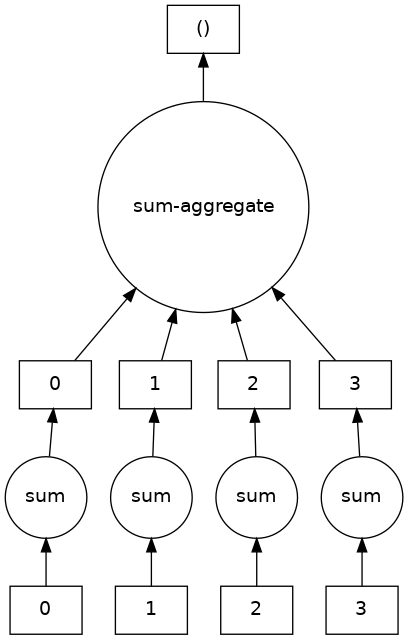

In [11]:
dask_arr_from_np.sum().visualize()

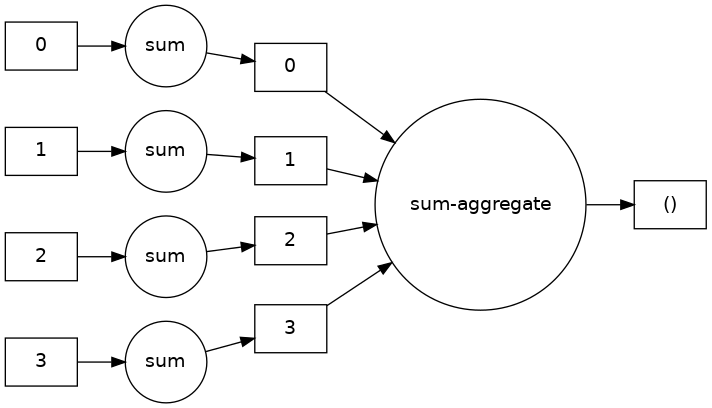

In [12]:
dask_arr_from_np.sum().visualize(rankdir="LR")

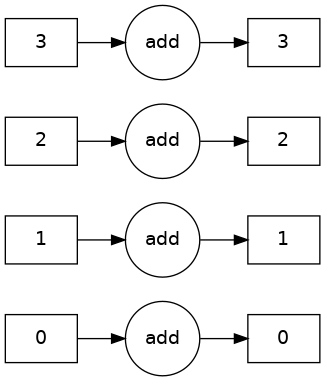

In [13]:
(dask_arr_from_np+1).visualize(rankdir="LR")

In [14]:
dask_arr_mean = da.mean(dask_arr_from_np)
dask_arr_mean.compute()

8.15

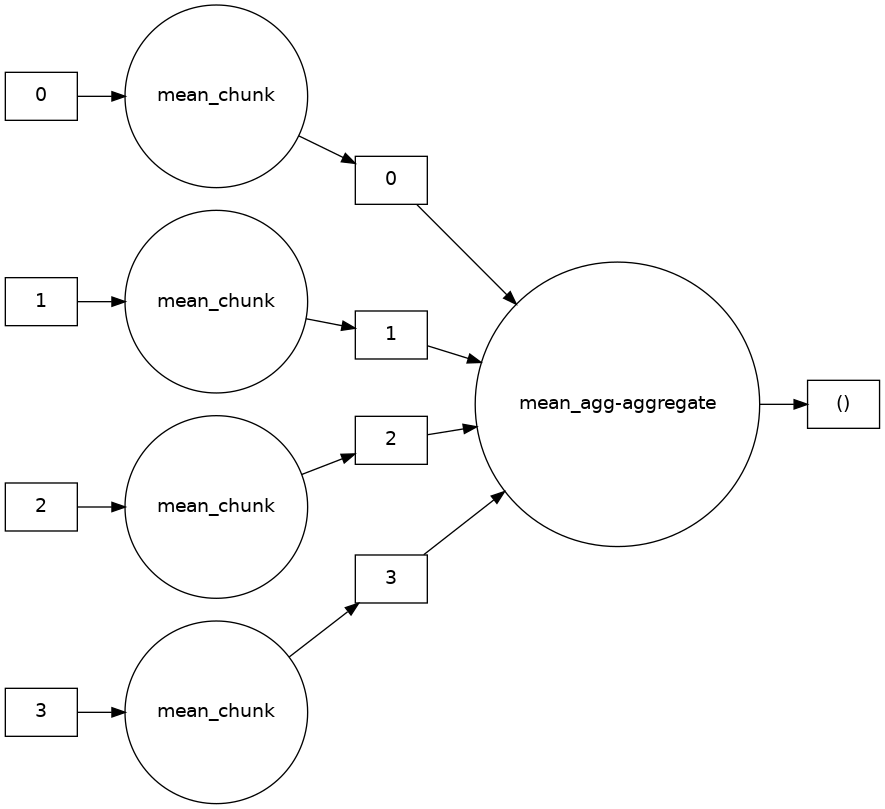

In [15]:
dask_arr_mean.visualize(rankdir="LR")

## Another Example

In [16]:
x = da.random.random(10, chunks=2)
y = da.random.random(10, chunks=2)

sum_x_y = da.add(x, y) #similar to numpy.add
mean_x_y = da.mean(sum_x_y)

In [17]:
sum_x_y.compute()

array([0.6016571 , 0.61747458, 1.4586761 , 1.30612183, 0.27683527,
       0.74734654, 1.51097549, 0.26720758, 1.1104149 , 1.78367043])

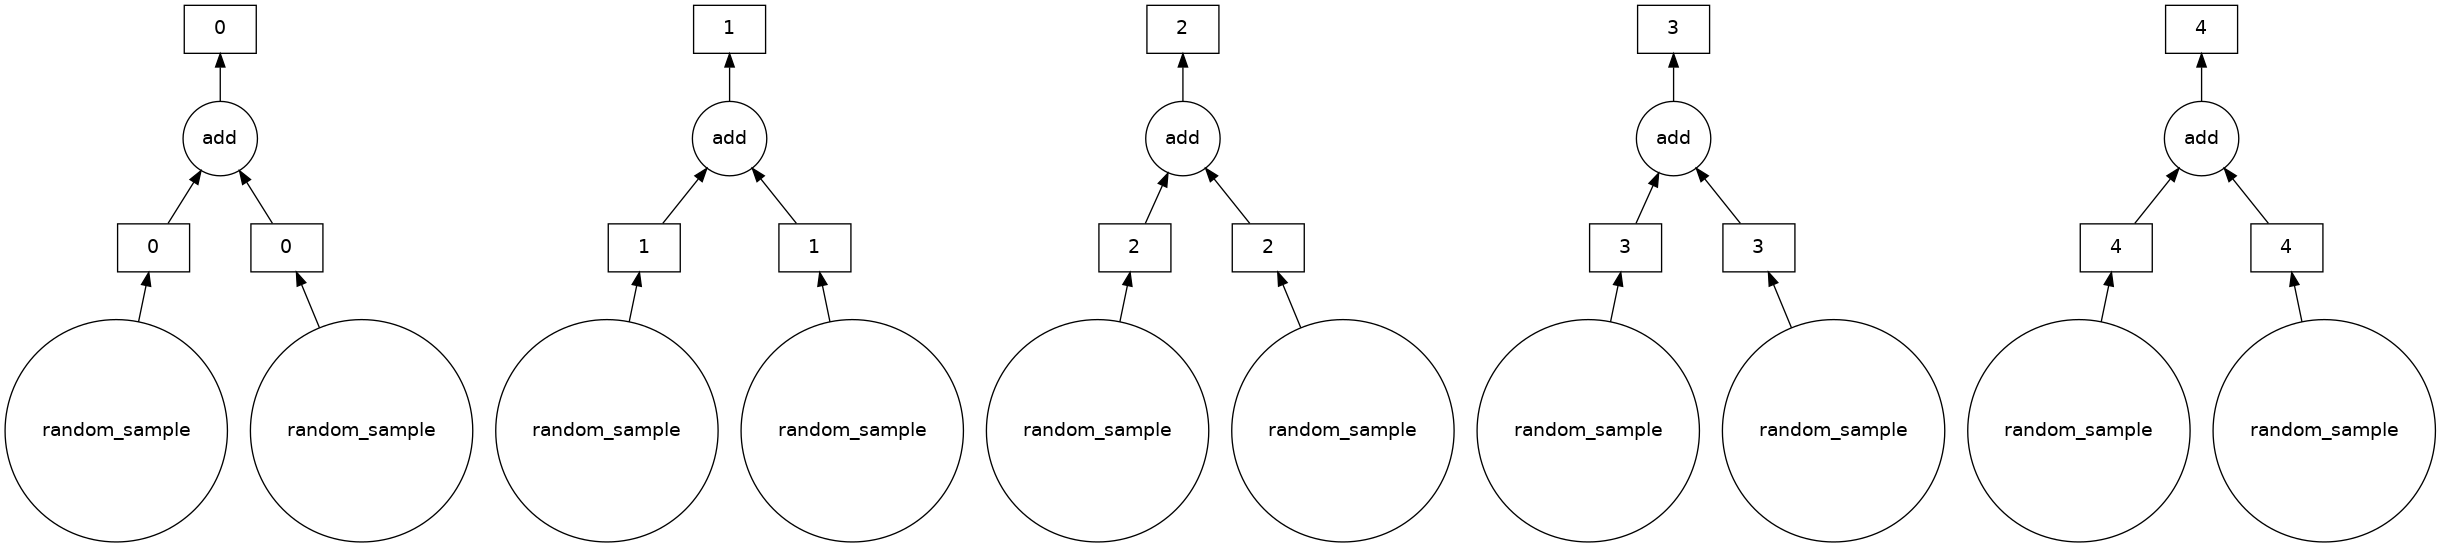

In [18]:
sum_x_y.visualize()

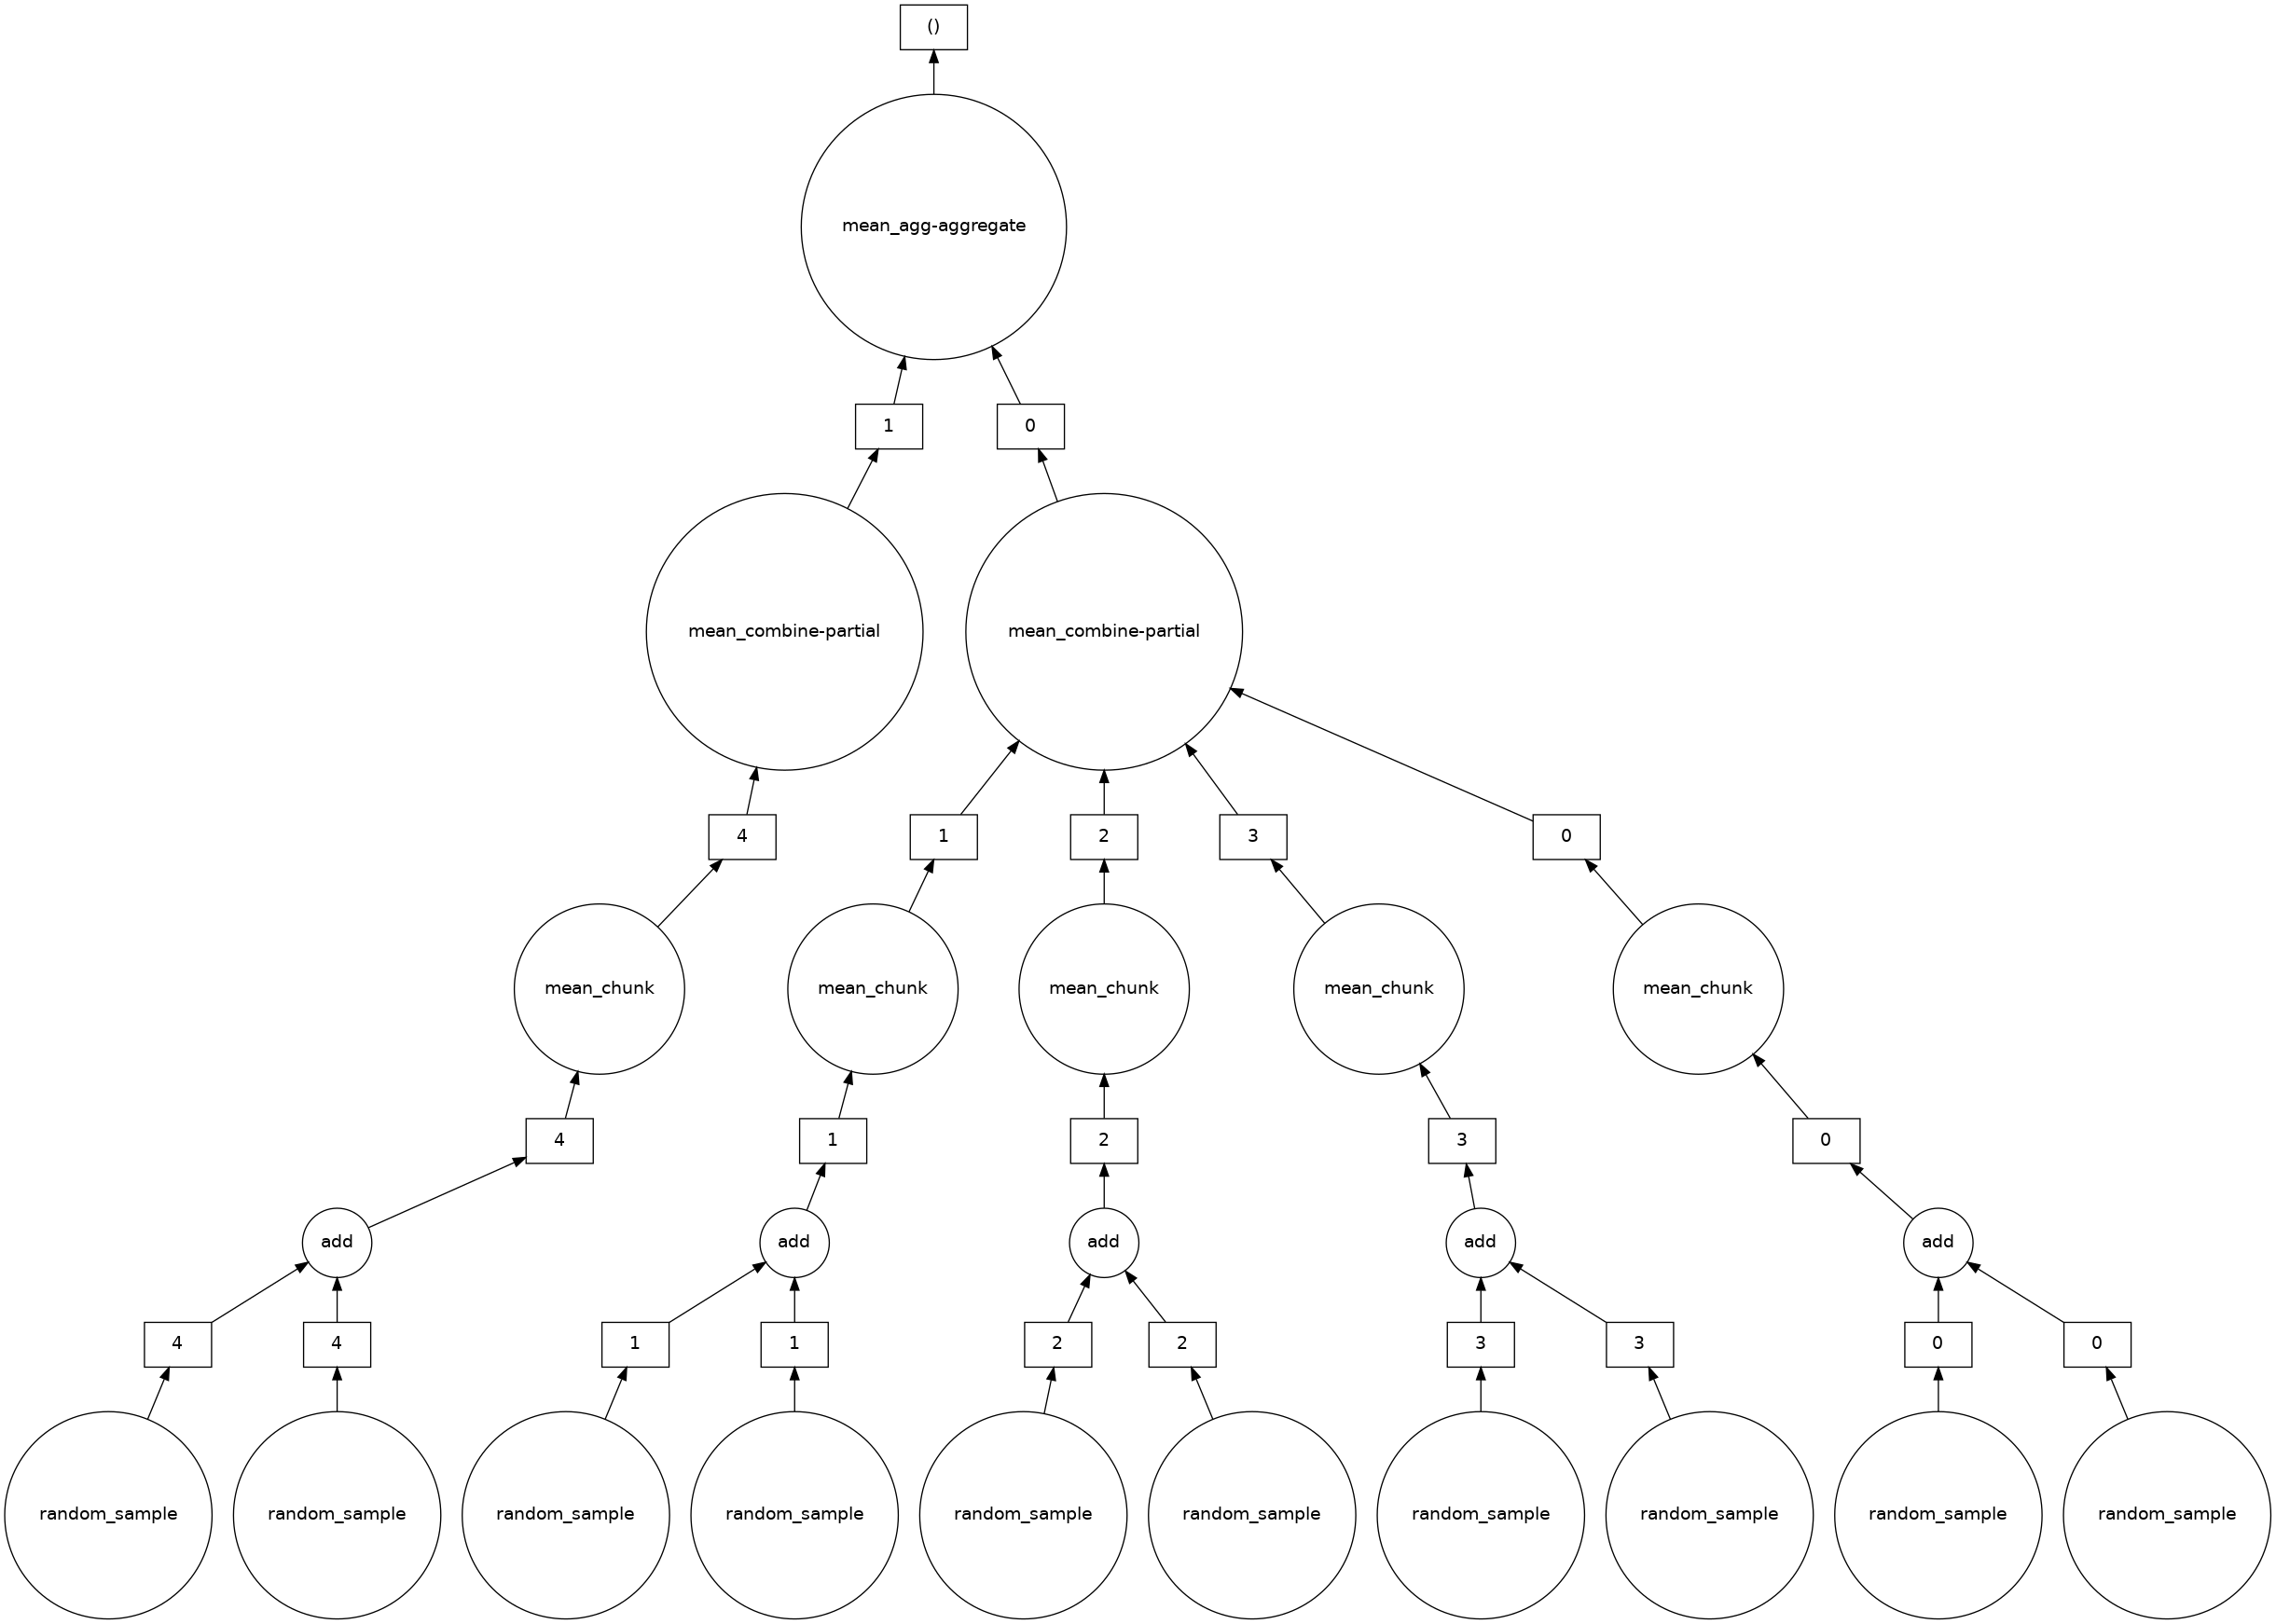

In [19]:
mean_x_y.visualize()

## An example of out-of-memory computation

In [20]:
da_arr_large = da.random.randint(10000, size=(50000, 50000),
                                 chunks=(5000, 1000))   
da_sum_large = da_arr_large.sum()   

### Get no. bytes using `nbytes` : http://docs.dask.org/en/latest/array-api.html#dask.array.Array.nbytes

In [21]:
da_arr_large.nbytes  

20000000000

### Convert bytes to GB, 1Gb = 1e+9 bytes

In [22]:
da_arr_large.nbytes/1e+9

20.0

In [23]:
da_sum_large.compute()

12498741240415